In [14]:
from fastai.vision.all import *
from duckduckgo_search import ddg_images
from fastdownload import download_url
from fastcore.all import *
from time import sleep


In [11]:
def search_images(term, max_images = 30 ):
    print(f'Searching for {term}')
    return L(ddg_images(term, max_results= max_images)).itemgot('image')

In [24]:
urls = search_images('light weight transport vehicle')

Searching for light weight transport vehicle


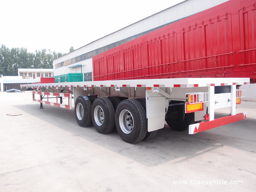

In [25]:
dest= 'htv.jpg'
download_url(urls[2],dest=dest)
im = Image.open(dest)
im.to_thumb(256,256)

In [9]:
searchs = 'ltv','htv'
path = Path('htv_or_not')

for o in searchs:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest = dest , urls= search_images(f'{o} vehicle photo',300) )
    sleep(10)
    resize_images(path/o, max_size= 400, dest= path/o)

NameError: name 'search_images' is not defined

In [10]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

In [ ]:
dls = DataBlock(blocks=[ImageBlock, CategoryBlock], 
               get_items=get_image_files,
               splitter= RandomSplitter(seed= 42),lab
               get_y=parent_label, item_tfms= [Resize(192,method='squish')],
               batch_tfms = [aug_transforms(mult =2)]
               ).dataloaders(path,bs=32)
dls.show_batch(max_n= 6)

In [ ]:
learn = vision_learner(dls, resnet18, metrics= error_rate)

In [ ]:
learn.fine_tune(5)

In [ ]:
is_htv, _, probs = learn.predict(PILImage.create('birdss.jpg'))
print(f'this is a {is_htv}')
print(f'prob it is a bird :{probs[0]:.4f}')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
interp.plot_top_losses(5,nrows=1,figsize=(17,4))

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [ ]:
learn.export()